In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import clear_output

In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [107]:
colors = ['orange', 'darkblue', 'darkgreen', 'purple', 'lightgreen', 'pink', 'black', 'lightblue']*5     # Colors to differentiate clusters

# Loading Data

In [5]:
data_path = '\\Users\luisr\Desktop\Repository\Data-Science-Projects\Data_Science_Projects\Clusters Demográficos e Econômicos de Bairros do Rio de Janeiro\Data\Final Data\\gym_neighborhood_data.csv'

data = pd.read_csv(data_path)

### Feature Engineering

In [6]:
cols=data.columns

In [7]:
data['adult pop'] = data[data.columns.tolist()[23:29]].sum(axis=1)

data['gym/adult_pop'] = data['gyms'] / data['adult pop']

data['adult_pop/Km2'] = data['adult pop'] / data['Km2']

In [8]:
data[cols[38]+'/Km2'] = (data.set_index('neighborhood')[cols[38]] / data.set_index('neighborhood')['Km2']).to_frame()
data[cols[39]+'/Km2'] = (data.set_index('neighborhood')[cols[39]] / data.set_index('neighborhood')['Km2']).to_frame()

# Filtered Neighborhoods

In [ ]:
income_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/income_filtered.csv', index_col=0)

pop_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/population_filtered.csv', index_col=0)

com_filt = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/comerce_filtered.csv', index_col=0)

In [ ]:
filtered = pd.read_csv('/Users/luisr/Desktop/Repository/IBM_courses/Course Work/Assignments/Final Capstone Project/rio dataframes/Filtered Neighborhoods/filtered_3.csv', index_col=0)


In [38]:
fig_path='Plots\{}'

In [10]:
recom_path = 'Recommendation Datasets\{}'
filtered = pd.read_csv(recom_path.format('General.csv'), index_col=0)

# Feature Selection

In [11]:
data.columns.tolist()[-10:]

['pop/Km2',
 'gym/Km2',
 'gym/pop',
 'gym/target_pop',
 'avg salary',
 'adult pop',
 'gym/adult_pop',
 'adult_pop/Km2',
 'Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2',
 'Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2']

In [12]:
gyms = data[['neighborhood',
             'gym/Km2',
             'gym/target_pop',
             'gym/adult_pop']].set_index('neighborhood')

In [13]:
gyms_filt = gyms.loc[filtered.index]

In [14]:
gyms = gyms_filt

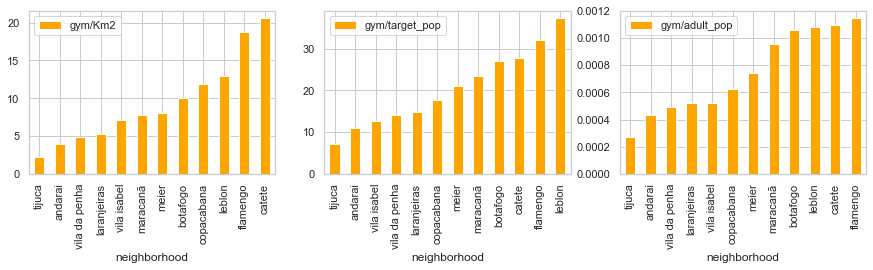

In [138]:
fig, axes = plt.subplots(1,3, figsize=(15,3))

#[gyms[gyms.columns[i]].sort_values().plot.bar(ax=axes[i], legend=True) for i in range(3)]
[gyms[gyms.columns[i]].sort_values().plot.bar(ax=axes[i], legend=True, color='orange') for i in range(3)]
#[axes[i].set_xticks([]) for i in range(3)]
plt.show()

fig.savefig(fig_path.format('gyms_features_barplot.png'))

### Exploratory Analysis

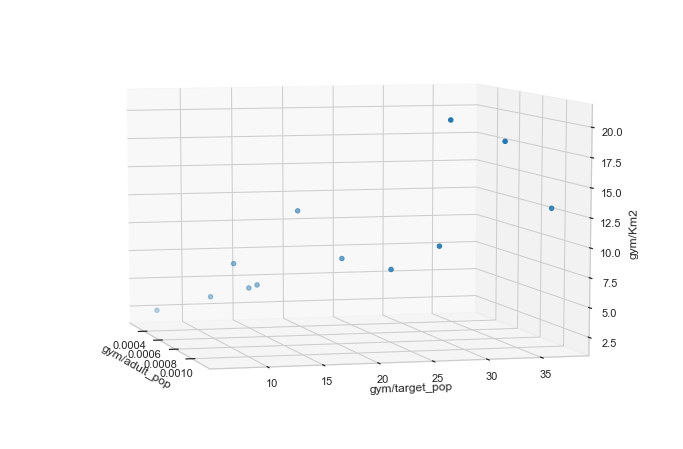

In [17]:
z = 'gym/Km2'
y = 'gym/target_pop'
x = 'gym/adult_pop'

for angle in range(0,360,15):
    
    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(1,1,1, projection='3d')
    
    ax0.scatter(gyms[x], gyms[y], gyms[z])
    ax0.set(xlabel=x, ylabel=y, zlabel=z)
    
    ax0.view_init(8,angle)
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)

In [30]:
gyms.columns

Index(['gym/Km2', 'gym/target_pop', 'gym/adult_pop'], dtype='object')

# Data Transformation

In [22]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler as mms, StandardScaler as ss

In [23]:
gyms_log = gyms.apply(np.log1p)

gyms_ss = ss().fit_transform(gyms_log)

gyms_mms = mms().fit_transform(gyms_log)

# Optimization

In [ ]:
scrs = []

for n_clusters in range(1,30):
    kmeans = KMeans(n_clusters=n_clusters).fit(gyms_ss)
    scrs.append([n_clusters, kmeans.inertia_])
    if n_clusters in range(1,30,3): print(n_clusters, kmeans.n_iter_)

scrs_df = pd.DataFrame(scrs, columns=['n_clusters', 'inertia'])

In [ ]:
scrs_df.plot(x='n_clusters', y='inertia', xticks=range(30))
plt.show()

# K-Means Clustering

In [25]:
from sklearn.cluster import KMeans

In [103]:
kmeans = KMeans(n_clusters=4, max_iter=20).fit(gyms_ss)

In [104]:
gyms['cluster'] = kmeans.labels_

# Density Based Scan Clustering

In [35]:
from sklearn.cluster import DBSCAN

In [75]:
dbs = DBSCAN(eps=0.1, min_samples=1)
dbs.fit(gyms)
gyms['cluster'] = dbs.labels_

In [ ]:
gyms['cluster'].unique()

# Mean Shift Clustering

In [145]:
from sklearn.cluster import MeanShift

In [ ]:
mean_shift = MeanShift(bandwidth=).fit(gyms)

# Clustering Visualization

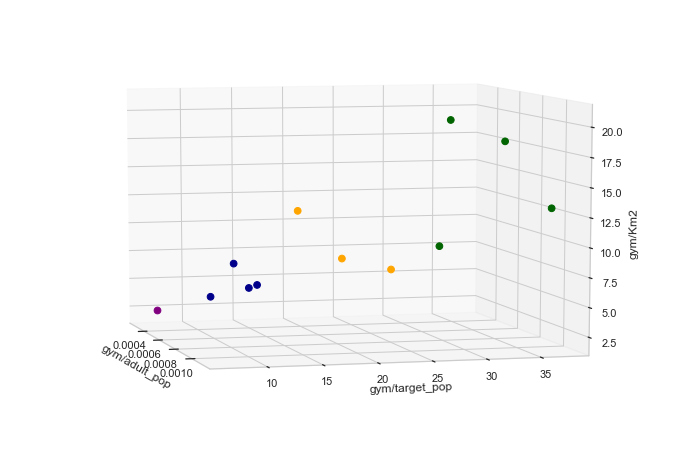

In [108]:
z = 'gym/Km2'
y = 'gym/target_pop'
x = 'gym/adult_pop'

for angle in range(0,360,15):
    
    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(1,1,1, projection='3d')
    ax0.set(xlabel=x, ylabel=y, zlabel=z)
    
    for cluster in gyms['cluster'].unique():
        
        ax0.scatter(gyms[gyms['cluster']==cluster][x], gyms[gyms['cluster']==cluster][y], gyms[gyms['cluster']==cluster][z], color=colors[cluster], alpha=1, s=45)
    
    ax0.view_init(8,angle)
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    
    fig.savefig(fig_path.format('gyms clusters 3d rotation\gyms_clusters_3d_scatter_plot_{}°.png'.format(angle)))
    

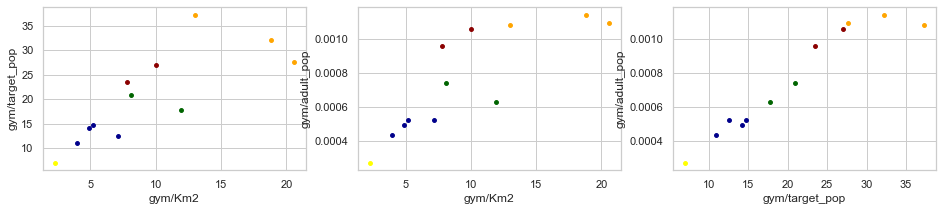

In [32]:
fig = plt.figure(figsize=(16,3))
axes = [fig.add_subplot(1,3,i) for i in range(1,4)]

cnt=0
for i, col1 in enumerate(gyms.columns[:-1]):
    for j, col2 in enumerate(gyms.columns[:-1]):
        if i<j:
            
            for cluster in gyms['cluster'].unique():
                
                axes[cnt].scatter(gyms[gyms['cluster']==cluster][col1], gyms[gyms['cluster']==cluster][col2], color=colors[cluster], s=15)
                axes[cnt].set_xlabel(col1)
                axes[cnt].set_ylabel(col2)
            
            cnt+=1
            
fig.savefig('Plots/gyms_clusters_scatterplot.png')

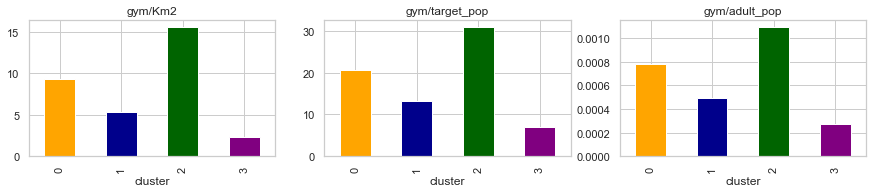

In [109]:
gym_mean = gyms.groupby('cluster').mean()

fig = plt.figure(figsize=(15,2.5))
axes = [fig.add_subplot(1,3,i) for i in range(1, len(gyms.columns))]

for i, col in enumerate(gym_mean):
    gym_mean[col].plot(kind='bar', ax=axes[i], title=gyms.columns[i], color=[colors[cluster] for cluster in range(len(gyms['cluster'].unique()))])

fig.savefig('Plots/gyms_clusters_averages_barplots.png')

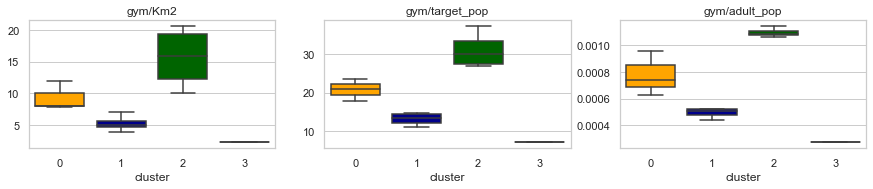

In [110]:
fig = plt.figure(figsize=(15,8))
axes=[fig.add_subplot(3,3,i+1) for i in range(len(gyms.columns)-1)]

for i in range(len(gyms.columns)-1):
    
    sns.boxplot(data=gyms, x='cluster', y=gyms.columns[i], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(gyms.columns[i])

    for j in range(len(gyms['cluster'].unique())):
        axes[i].artists[j].set_facecolor(colors[j])   # Setting colors to match clusters colors.
    
fig.savefig('Plots/gyms_clusters_boxplots.png')

In [139]:
gyms

,gym/Km2,gym/target_pop,gym/adult_pop,cluster
neighborhood,,,,
andarai,3.980011,10.984987,0.000436,1
botafogo,10.002176,27.001181,0.001061,2
catete,20.557196,27.657053,0.001093,2
copacabana,11.948742,17.798118,0.000626,0
flamengo,18.830635,32.137674,0.001144,2
laranjeiras,5.213540,14.791216,0.000520,1
leblon,13.004530,37.243948,0.001080,2
maracanã,7.797027,23.529412,0.000959,0
meier,8.094108,20.948989,0.000742,0


# Final Filtering

In [112]:
filtered_gym = filtered.loc[gyms[gyms['cluster'].isin([1,3])].index]

In [113]:
final_filtered = pd.merge(filtered_gym.reset_index(), gyms.reset_index(), on='neighborhood').rename(columns={'cluster':'cluster_gym'}).set_index('neighborhood')

In [114]:
final_filtered

,"Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)",Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2,"Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2",cluster_inc,adult_pop/Km2,target_pop/Km2,cluster_pop,Comércio varejista_x,"Instituições de crédito, seguros e capitalização_x","Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x","Serviços de alojamento, alimentação, reparação, manutenção, redação..._x","Serviços médicos, odontológicos e veterinários_x",Ensino_x,cluster_com,gym/Km2,gym/target_pop,gym/adult_pop,cluster_gym
neighborhood,,,,,,,,,,,,,,,,,,
andarai,3072.576839,6048.731734,1.858519e+07,3,9123.068846,3623.136357,4,195.0,25.0,249.0,133.0,13.0,14.0,1,3.980011,10.984987,0.000436,1
laranjeiras,5520.633560,7021.836069,3.876498e+07,8,10028.043344,3524.753967,4,158.0,14.0,481.0,193.0,55.0,40.0,1,5.213540,14.791216,0.000520,1
tijuca,4172.251077,5740.665065,2.395150e+07,3,8468.183863,3245.423493,4,1288.0,89.0,1993.0,892.0,843.0,175.0,6,2.285020,7.040744,0.000270,3
vila da penha,2616.259539,5896.013865,1.542550e+07,3,9866.855572,3431.041264,4,290.0,12.0,181.0,168.0,86.0,59.0,1,4.875617,14.210313,0.000494,1
vila isabel,3096.927770,9002.756155,2.788089e+07,3,13751.093793,5692.347943,0,276.0,22.0,556.0,214.0,106.0,42.0,5,7.149238,12.559384,0.000520,1


In [53]:
clus_cols = ['cluster_gym', 'cluster_com', 'cluster_pop', 'cluster_inc']

In [115]:
import dataframe_image as dfi

In [116]:
dfi.export(final_filtered.drop(clus_cols, axis=1).T, recom_path.format('Final_Filtered.png'))

In [140]:
dfi.export(gyms, recom_path.format('General_gyms.png'))

# Result Analysis

In [117]:
from sklearn.preprocessing import StandardScaler as ss, MinMaxScaler as mms

In [118]:
filters = final_filtered.drop(['cluster_inc', 'cluster_pop', 'cluster_com', 'cluster_gym'], axis=1).columns

In [119]:
filters_max = filters[:-3]
filters_min = filters[-3:]

In [120]:
filters

Index(['Valor do rendimento nominal médio mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)',
       'Pessoas com rendimento responsáveis pelos domicílios particulares permanentes/Km2',
       'Valor do rendimento total mensal das pessoas com rendimento, responsáveis pelos domicílios particulares permanentes (R$)/Km2',
       'adult_pop/Km2', 'target_pop/Km2', 'Comércio varejista_x',
       'Instituições de crédito, seguros e capitalização_x',
       'Comércio e administração de imóveis, valores mobiliários, serviços técnicos_x',
       'Serviços de alojamento, alimentação, reparação, manutenção, redação..._x',
       'Serviços médicos, odontológicos e veterinários_x', 'Ensino_x',
       'gym/Km2', 'gym/target_pop', 'gym/adult_pop'],
      dtype='object')

In [121]:
excluded = data.set_index('neighborhood').loc[:, filters].drop(final_filtered.index.values)

In [122]:
data['result'] = ['included' if neighborhood in final_filtered.index else 'excluded' for neighborhood in data['neighborhood']]

### Visualization

C:\Users\luisr\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\luisr\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


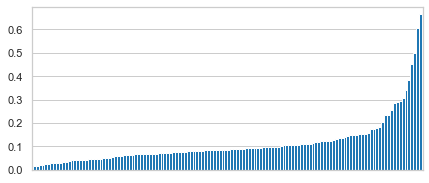

In [123]:
pd.DataFrame(mms().fit_transform(data.set_index('neighborhood')[filters_max.tolist()])).mean(axis=1).sort_values().plot.bar(xticks=[], width=1, figsize=(7,3))

In [124]:
high_index = pd.DataFrame(mms().fit_transform(data.set_index('neighborhood')[filters_max.tolist()])).mean(axis=1).sort_values().tail(15).index

C:\Users\luisr\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\luisr\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [125]:
[i for i in filtered.index if i in data.iloc[high_index]['neighborhood'].tolist()]

['botafogo',
 'catete',
 'copacabana',
 'flamengo',
 'laranjeiras',
 'leblon',
 'meier',
 'tijuca',
 'vila isabel']

In [126]:
[i for i in filtered.index if i not in data.iloc[high_index]['neighborhood'].tolist()]

['andarai', 'maracanã', 'vila da penha']

### Comparing

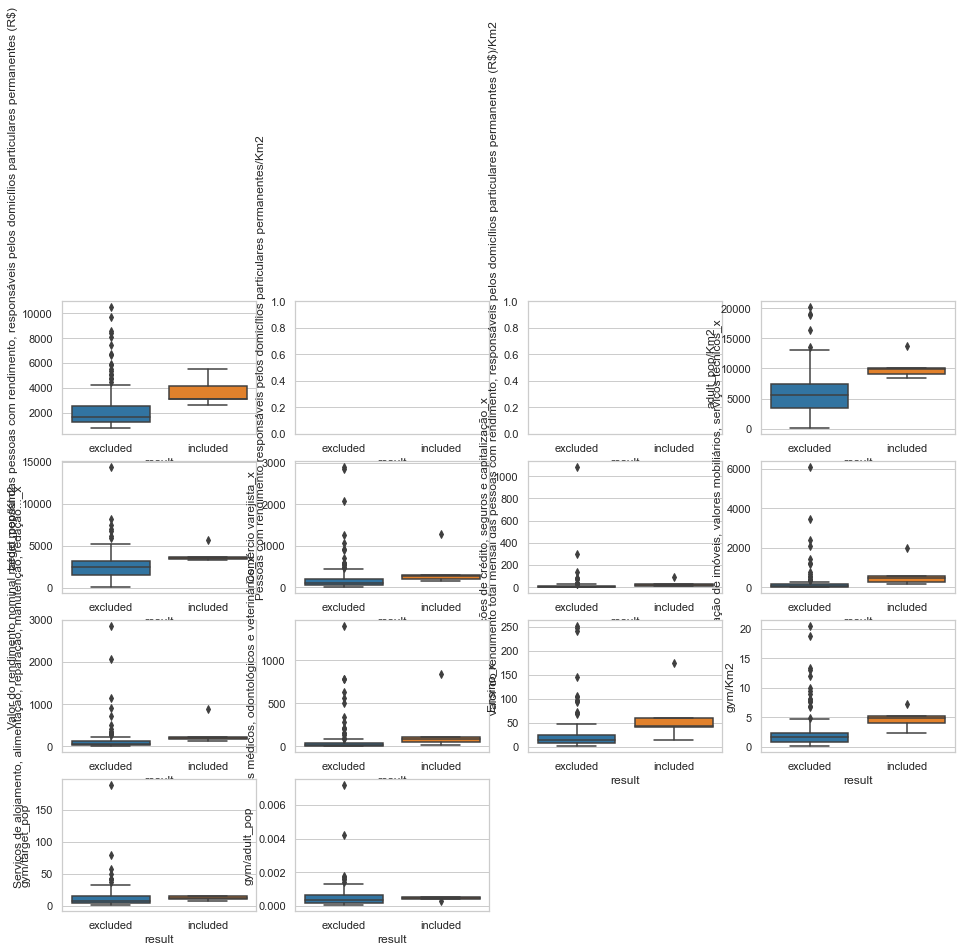

In [127]:
fig = plt.figure(figsize=(16,20))

axes = [fig.add_subplot(7,4,i) for i in range(1,(len(filters)+1))]

cnt = 0
for i, col in enumerate(filters):
    
    sns.boxplot(data=data, x='result', y=col, ax=axes[i])

### Gyms

In [128]:
final_filtered[filters_min].mean()

gym/Km2            4.700685
gym/target_pop    11.917329
gym/adult_pop      0.000448
dtype: float64

In [129]:
excluded[filters_min].mean()

gym/Km2            2.558103
gym/target_pop    13.173228
gym/adult_pop      0.000541
dtype: float64

In [130]:
data[filters_min].mean()

gym/Km2            2.638050
gym/target_pop    13.126366
gym/adult_pop      0.000537
dtype: float64

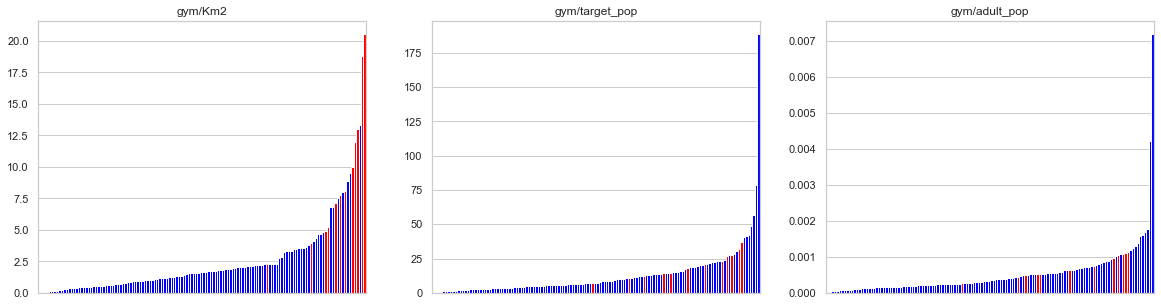

In [131]:
fig = plt.figure(figsize=(20,5))
axes = [fig.add_subplot(1,3,i) for i in range(1, len(filters_min)+1)]

for i, col in enumerate(filters_min):
    
    colors_included = ['blue' if neighborhood not in filtered.index.tolist() else 'red' for neighborhood in data.sort_values(by=col)['neighborhood']]

    data[col].sort_values().plot.bar(xticks=[], width=1, ax=axes[i], color = colors_included, title=col)

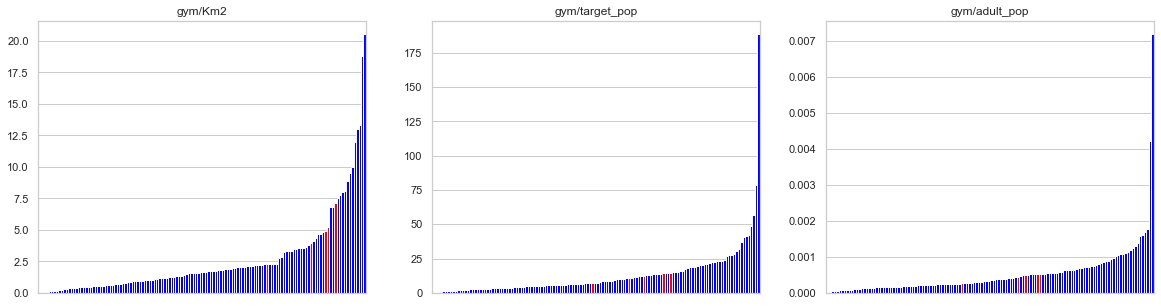

In [132]:
fig = plt.figure(figsize=(20,5))
axes = [fig.add_subplot(1,3,i) for i in range(1, len(filters_min)+1)]

for i, col in enumerate(filters_min):

    
    colors_included = ['blue' if neighborhood not in filtered_gym.index.tolist() else 'red' for neighborhood in data.sort_values(by=col)['neighborhood']]

    data[col].sort_values().plot.bar(xticks=[], width=1, ax=axes[i], color = colors_included, title=col)
    
fig.savefig('Plots/gyms_clusters_rank_barplots.png')